## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd
import numpy  as np

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv")
data.shape

(1000, 21)

In [3]:
data.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [4]:
data.tail(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [5]:
# none не являются пропущенным значением
if ((data.loc[:, :] == "").sum() + data.isnull().sum() + (data.loc[:, :] == np.nan).sum()).sum():
    print("Пропуски есть")
else:
    print("Пропусков нет")


Пропусков нет


In [6]:
data.number_credits.value_counts()

1       633
2-3     333
4-5      28
>= 6      6
Name: number_credits, dtype: int64

**Количественные**: 
* duration 
* amount
* age

**Бинарные**:
- telephone 
- foreign_worker 
- credit_risk

**Порядковые**:
- status
- savings
- employment_duration
- installment_rate
- people_liable
- present_residence
- number_credits

**Категориальные**: 
- credit_history
- purpose
- personal_status_sex
- other_debtors 
- property
- other_installment_plans
- housing
- job

In [7]:
data.dtypes

status                     object
duration                    int64
credit_history             object
purpose                    object
amount                      int64
savings                    object
employment_duration        object
installment_rate           object
personal_status_sex        object
other_debtors              object
present_residence          object
property                   object
age                         int64
other_installment_plans    object
housing                    object
number_credits             object
job                        object
people_liable              object
telephone                  object
foreign_worker             object
credit_risk                object
dtype: object

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка `amount`) в каждой категории (колонка `purpose`), воспользовавшись методом groupby.

In [8]:
data.groupby("purpose")["amount"].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [9]:
print(((data.age < 30) & (data.housing == "rent")).sum() / data.shape[0] * 100, "%", "клиентов моложе 30 лет снимает жильё.")

print(data[data.age > 40].groupby("housing")["age"].count()["rent"] / data.shape[0] * 100, "%", "клиентов старше 40 лет снимает жильё.")

24.6 % клиентов моложе 30 лет снимает жильё.
18.5 % клиентов старше 40 лет снимает жильё.


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [10]:
((data.foreign_worker == "yes") & ((data.number_credits == "4-5") | (data.number_credits == ">= 6"))).sum()
# Неэффективно(?) 
# Как проще? Например: (data.number_credits in ["4-5", ">= 6"])

1

In [11]:
data.number_credits.unique()

array(['1', '2-3', '4-5', '>= 6'], dtype=object)

### Задание 6 (1 балл)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

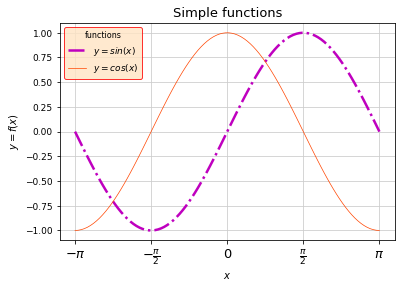

In [13]:
x = np.linspace(-np.pi, np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = plt.subplots() 

ax.plot(x, y1, linewidth=2.5, linestyle="-.", color="m", label=r"$y = sin(x)$")
ax.plot(x, y2, linewidth=0.7, color="#FF4500", label=r"$y = cos(x)$")
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'], fontsize=13)
plt.yticks(fontsize=9)
plt.title("Simple functions", fontsize=13)
plt.xlabel(r"$x$")
plt.ylabel(r"$y=f(x)$")
ax.grid(axis="both", color="0.8")

ax.legend(fontsize = 9,
          ncol = 1,
          facecolor = 'bisque',
          edgecolor = 'r',
          title = 'functions',
          title_fontsize = '8'
         )

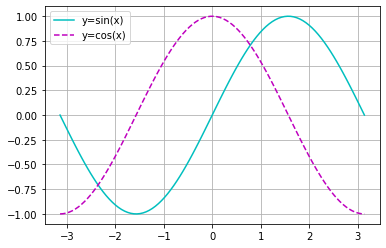

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [14]:
good_risk = data[data.credit_risk == "good"]
bad_risk = data[data.credit_risk == "bad"]

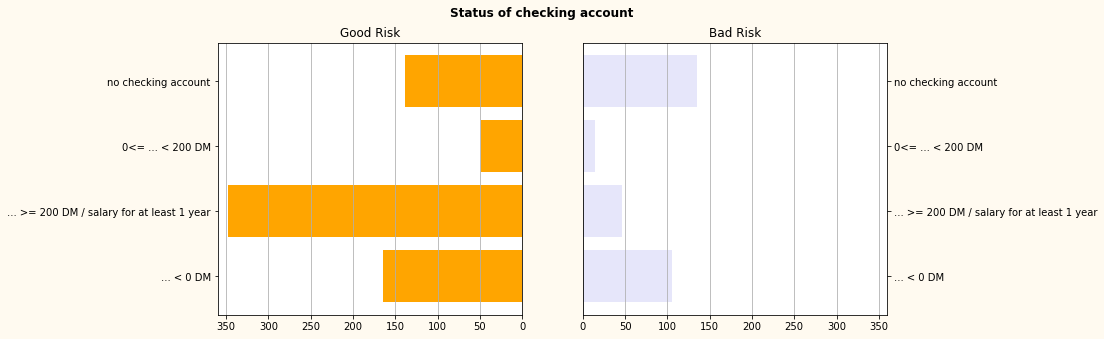

In [16]:
fig, (ax, ax1) = plt.subplots(ncols=2, constrained_layout=False)

ax.grid(axis='x')
ax1.grid(axis='x')

ax.set_title("Good Risk")
ax1.set_title("Bad Risk")
ax.set_xlim([-360, 0])
ax1.set_xlim([0, 360])

ax.barh(data.status.unique(), -good_risk.groupby("status")["credit_risk"].count(), align='center', 
        tick_label = ["no checking account", "0<= ... < 200 DM", "... >= 200 DM / salary for at least 1 year", "... < 0 DM"][::-1],
        color="orange")
ax1.barh(data.status.unique(), bad_risk.groupby("status")["credit_risk"].count(), color="lavender", 
         tick_label = ["no checking account", "0<= ... < 200 DM", "... >= 200 DM / salary for at least 1 year", "... < 0 DM"][::-1],)

fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(5)    #  высота Figure
fig.set_facecolor('floralwhite')
fig.suptitle("Status of checking account", fontweight='bold')

ax1.yaxis.tick_right()

delims = list(np.arange(-350, 1, 50))
names = list(map(lambda x: str(-x), delims))
ax.set_xticks(delims)
ax.set_xticklabels(names)

plt.show()

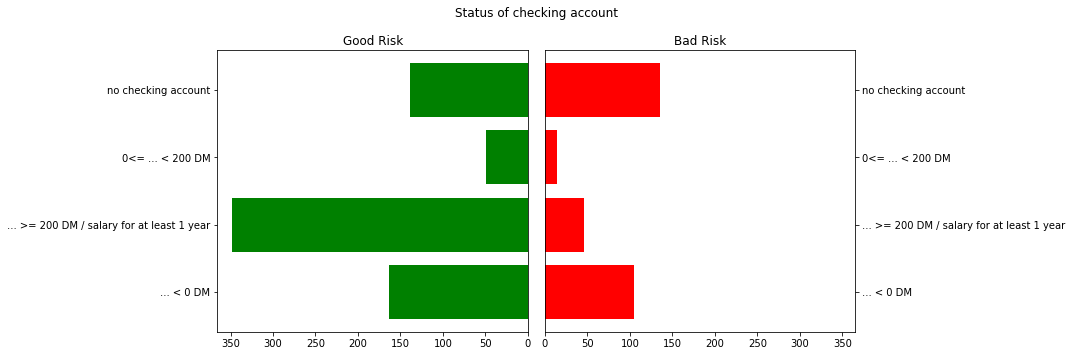

### Задание 8  (0.5 балла)

In [17]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

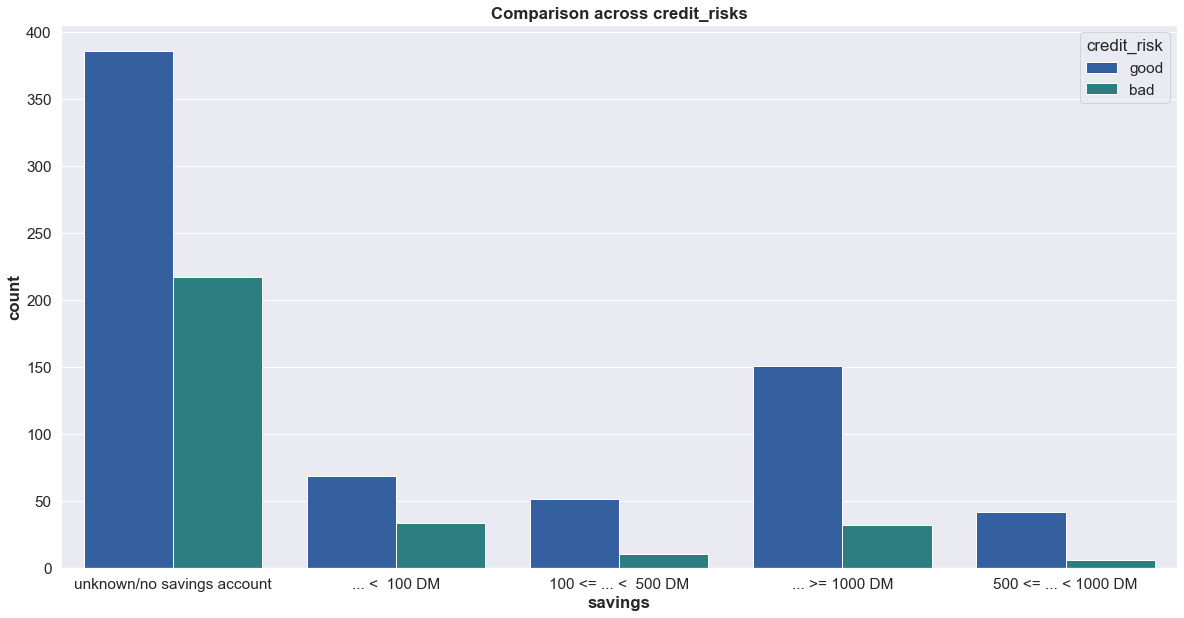

In [19]:
figure = sns.countplot(data=data, x="savings", hue="credit_risk", saturation=0.5, palette="winter")
figure.figure.set_figwidth(20)
figure.figure.set_figheight(10)

sns.set(font_scale=1.4)
figure.set_title("Comparison across credit_risks", fontweight="heavy")

figure.set_ylabel("count", fontweight="bold")
figure.set_xlabel("savings", fontweight="bold")

plt.show()

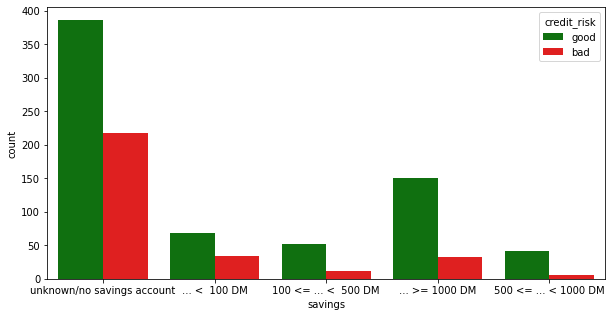

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

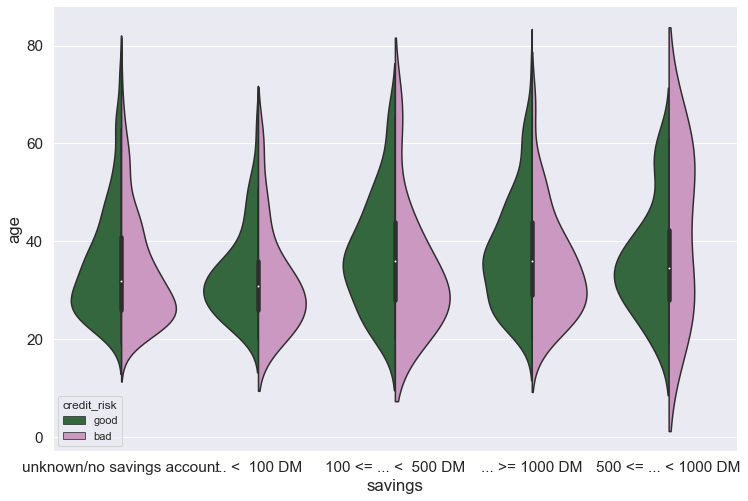

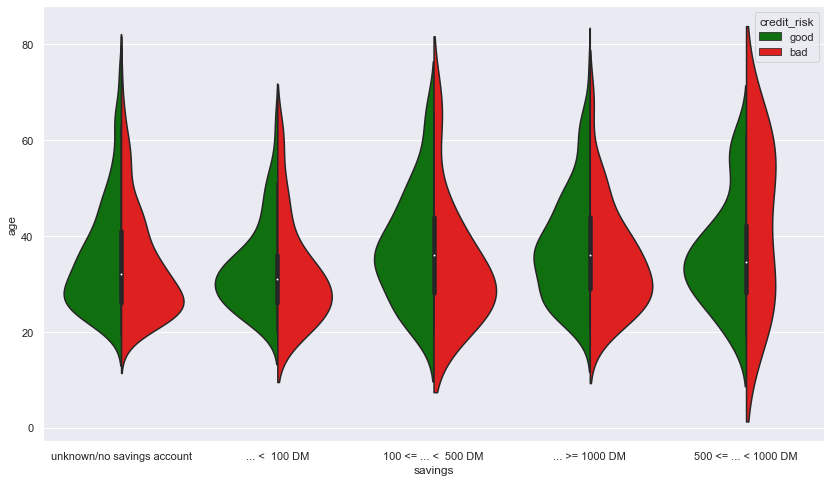

In [20]:
new = sns.catplot(data=data, x="savings", y="age", hue="credit_risk", orient='v', kind="violin", 
                  height=7, palette="cubehelix", split=True, aspect = 1.5, legend_out=False)
sns.set(font_scale=1)
plt.legend(loc='lower left', title="credit_risk")

plt.show()

vio = sns.violinplot(data=data, x="savings", y="age", hue="credit_risk", split=True, palette=["green", "red"])
vio.figure.set_figwidth(14)
vio.figure.set_figheight(8)

plt.show()

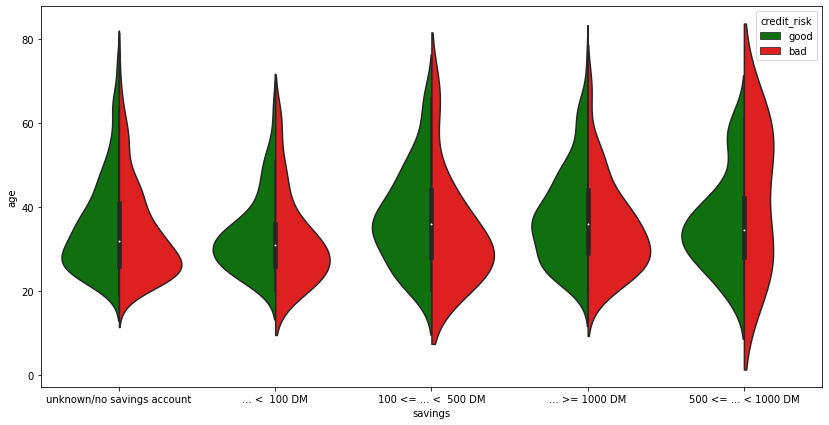

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

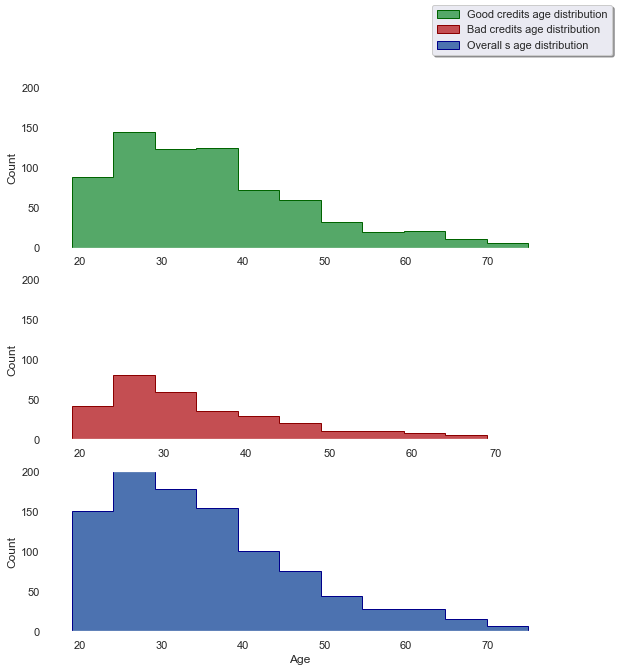

In [21]:
# Using matplotlib


fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

# Можно ли не перебирать вручную значения (credit_risk)?
ax1.hist(data[data.credit_risk == "good"].age, 11, color="g", label="Good credits age distribution", histtype="stepfilled", edgecolor="darkgreen")
ax2.hist(data[data.credit_risk == "bad"].age, 11, color="r", label="Bad credits age distribution", histtype="stepfilled", edgecolor="darkred")
ax3.hist(data.age, 11, color="b", label="Overall s age distribution", histtype="stepfilled", edgecolor="darkblue")

ax1.set(facecolor="w", ylabel="Count", ylim=(0, 200))
ax2.set(facecolor="w", ylabel="Count", ylim=(0, 200))
ax3.set(facecolor="w", ylabel="Count", xlabel="Age", ylim=(0, 200))
ax1.set_yticks(np.arange(0, 201, 50))


fig.legend(shadow=True)
fig.set_figheight(10)
fig.set_figwidth(9)

# fig.set_facecolor("blue")
# ax1.set_facecolor("RED")
# ax1.grid(True, color="black")

plt.show()

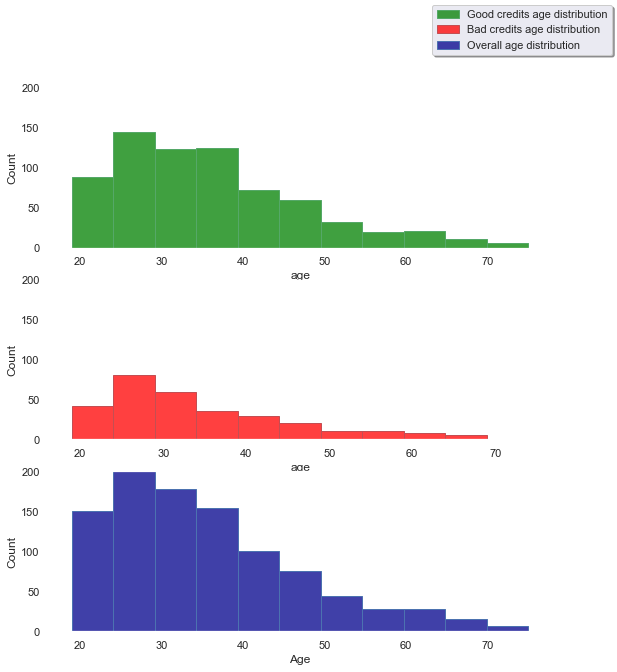

In [22]:
# Using matplotlib + seaborn

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

sns.histplot(x=data[data.credit_risk == "good"].age,  kde=False, bins = 11, ax=ax1, 
             label="Good credits age distribution", color='green', edgecolor="g")
sns.histplot(x=data[data.credit_risk == "bad"].age,  kde=False, bins = 11, ax=ax2, 
             label="Bad credits age distribution", color='red', edgecolor="r")
sns.histplot(x=data.age,  kde=False, bins = 11, ax=ax3, 
             label="Overall age distribution", color='darkblue', edgecolor="b")

ax1.set(facecolor="w", ylabel="Count", ylim=(0, 200))
ax2.set(facecolor="w", ylabel="Count", ylim=(0, 200))
ax3.set(facecolor="w", ylabel="Count", xlabel="Age", ylim=(0, 200))
ax1.set_yticks(np.arange(0, 201, 50))


fig.legend(shadow=True)
fig.set_figheight(10)
fig.set_figwidth(9)

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

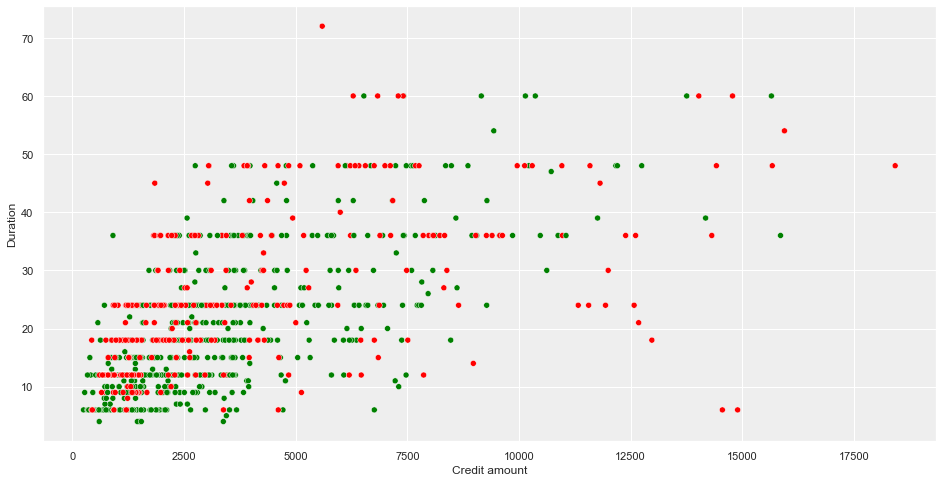

In [23]:
scat = sns.scatterplot(x="amount", y="duration", hue="credit_risk", data=data, palette=["green", "red"], legend=False)
scat.set_facecolor('#EEEEEE')

scat.figure.set_figheight(8)
scat.figure.set_figwidth(16)
scat.set_xlabel("Credit amount")
scat.set_ylabel("Duration")

plt.show()

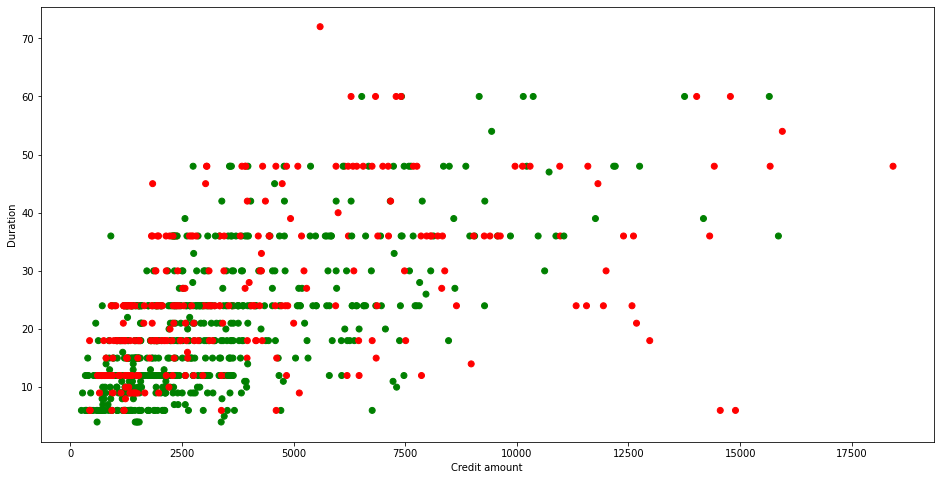

In [21]:
# Example

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

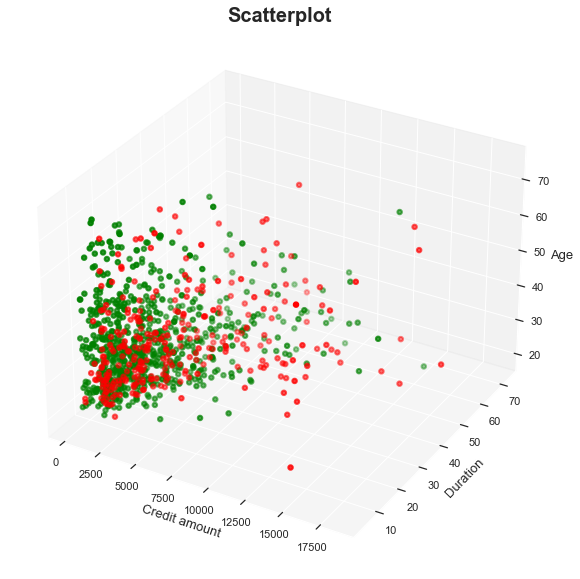

In [24]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
fig.set_figheight(10)
fig.set_figwidth (15)

for data_on_risk, color in zip(sorted(data.credit_risk.unique()), ["red", "green"]):
    temp_data = data[data.credit_risk == data_on_risk]
    ax.scatter(temp_data["amount"], temp_data["duration"], temp_data["age"], color=color, linewidths=2)
    

ax.set_facecolor('w')
ax.set_title("Scatterplot", fontweight="bold", fontsize=20)

lables_size = 13
ax.set_xlabel("Credit amount", fontweight="normal", fontsize=lables_size)
ax.set_ylabel("Duration", fontweight="normal", fontsize=lables_size)
ax.set_zlabel("Age", fontweight="normal", fontsize=lables_size)


# В документации (matplotlib.axes.Axes.grid) указана такая строка:
#    grid(color='r', linestyle='-', linewidth=2)
# Но это не работает...
# ax.grid(True, color=['blue'], linewidth=5, linestyle='.-')

plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

**Бинарные**:
- telephone 
- foreign_worker 
- credit_risk

**Порядковые**:
- status
- savings
- employment_duration
- installment_rate
- people_liable
- present_residence
- number_credits

**Категориальные**: 
- credit_history
- purpose
- personal_status_sex
- other_debtors 
- property
- other_installment_plans
- housing
- job

In [25]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


---
**Изменяем категориальные признаки** 
(Используем one-hot endcoding)

In [26]:
# Изменяем (job)

data = pd.get_dummies(data,columns=["job"], drop_first=True)
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,other_installment_plans,housing,number_credits,people_liable,telephone,foreign_worker,credit_risk,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,none,for free,1,0 to 2,no,no,good,1,0,0
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,none,for free,2-3,3 or more,no,no,good,1,0,0
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,none,for free,1,0 to 2,no,no,good,0,0,1
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,none,for free,2-3,3 or more,no,yes,good,0,0,1
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,bank,rent,2-3,0 to 2,no,yes,good,0,0,1


In [27]:
print(data.shape)
data.head()

(1000, 23)


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,other_installment_plans,housing,number_credits,people_liable,telephone,foreign_worker,credit_risk,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,none,for free,1,0 to 2,no,no,good,1,0,0
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,none,for free,2-3,3 or more,no,no,good,1,0,0
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,none,for free,1,0 to 2,no,no,good,0,0,1
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,none,for free,2-3,3 or more,no,yes,good,0,0,1
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,bank,rent,2-3,0 to 2,no,yes,good,0,0,1


In [28]:
data.dtypes

status                                     object
duration                                    int64
credit_history                             object
purpose                                    object
amount                                      int64
savings                                    object
employment_duration                        object
installment_rate                           object
personal_status_sex                        object
other_debtors                              object
present_residence                          object
property                                   object
age                                         int64
other_installment_plans                    object
housing                                    object
number_credits                             object
people_liable                              object
telephone                                  object
foreign_worker                             object
credit_risk                                object


In [29]:
# Изменяем (credit_history)

data = pd.get_dummies(data, columns=["credit_history"], drop_first=True)
data.head()

,status,duration,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,...,telephone,foreign_worker,credit_risk,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident,credit_history_critical account/other credits elsewhere,credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/all credits paid back duly
0,no checking account,18,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,>= 7 yrs,...,no,no,good,1,0,0,0,0,0,0
1,no checking account,9,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,1 <= ... < 4 yrs,...,no,no,good,1,0,0,0,0,0,0
2,... < 0 DM,12,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,>= 7 yrs,...,no,no,good,0,0,1,0,0,0,1
3,no checking account,12,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,1 <= ... < 4 yrs,...,no,yes,good,0,0,1,0,0,0,0
4,no checking account,12,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,>= 7 yrs,...,no,yes,good,0,0,1,0,0,0,0


In [30]:
print(data.shape)
data.head()

(1000, 26)


,status,duration,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,...,telephone,foreign_worker,credit_risk,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident,credit_history_critical account/other credits elsewhere,credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/all credits paid back duly
0,no checking account,18,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,>= 7 yrs,...,no,no,good,1,0,0,0,0,0,0
1,no checking account,9,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,1 <= ... < 4 yrs,...,no,no,good,1,0,0,0,0,0,0
2,... < 0 DM,12,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,>= 7 yrs,...,no,no,good,0,0,1,0,0,0,1
3,no checking account,12,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,1 <= ... < 4 yrs,...,no,yes,good,0,0,1,0,0,0,0
4,no checking account,12,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,>= 7 yrs,...,no,yes,good,0,0,1,0,0,0,0


In [31]:
# Изменяем (purpose)

data = pd.get_dummies(data, columns=["purpose"], drop_first=True)


# Изменяем (personal_status_sex)

data = pd.get_dummies(data, columns=["personal_status_sex"], drop_first=True)


# Изменяем (other_debtors)

data = pd.get_dummies(data, columns=["other_debtors"], drop_first=True)


# Изменяем (property)

data = pd.get_dummies(data, columns=["property"], drop_first=True)


# Изменяем (other_installment_plans)

data = pd.get_dummies(data, columns=["other_installment_plans"], drop_first=True)


# Изменяем (housing)

data = pd.get_dummies(data, columns=["housing"], drop_first=True)

# Можно было "в одну строчку" записать

print(data.shape)
data.head()

(1000, 41)


,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,...,personal_status_sex_male : married/widowed,other_debtors_guarantor,other_debtors_none,property_car or other,property_real estate,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent
0,no checking account,18,1049,unknown/no savings account,< 1 yr,< 20,>= 7 yrs,21,1,0 to 2,...,0,0,1,1,0,0,1,0,0,0
1,no checking account,9,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,1 <= ... < 4 yrs,36,2-3,3 or more,...,1,0,1,0,0,1,1,0,0,0
2,... < 0 DM,12,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,>= 7 yrs,23,1,0 to 2,...,0,0,1,0,0,1,1,0,0,0
3,no checking account,12,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,1 <= ... < 4 yrs,39,2-3,3 or more,...,1,0,1,0,0,1,1,0,0,0
4,no checking account,12,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,>= 7 yrs,38,2-3,0 to 2,...,1,0,1,1,0,0,0,0,0,1


---
**Изменяем бинарные признаки**

In [32]:
# telephone

data.telephone.value_counts()

no                           596
yes (under customer name)    404
Name: telephone, dtype: int64

In [33]:
data.telephone = data.telephone.apply(lambda val: 1 if val == "yes (under customer name)" else 0)
print(data.telephone.value_counts())

0    596
1    404
Name: telephone, dtype: int64


In [34]:
# foreign_worker

data.foreign_worker.value_counts()

no     963
yes     37
Name: foreign_worker, dtype: int64

In [35]:
data.foreign_worker = data.foreign_worker.apply(lambda val: 1 if val == "yes" else 0)
print(data.foreign_worker.value_counts())

0    963
1     37
Name: foreign_worker, dtype: int64


In [36]:
# credit_risk

data.credit_risk.value_counts()

good    700
bad     300
Name: credit_risk, dtype: int64

In [37]:
data.credit_risk = data.credit_risk.apply(lambda val: 1 if val == "good" else 0)
print(data.credit_risk.value_counts())

1    700
0    300
Name: credit_risk, dtype: int64


In [38]:
data.head()

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,...,personal_status_sex_male : married/widowed,other_debtors_guarantor,other_debtors_none,property_car or other,property_real estate,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent
0,no checking account,18,1049,unknown/no savings account,< 1 yr,< 20,>= 7 yrs,21,1,0 to 2,...,0,0,1,1,0,0,1,0,0,0
1,no checking account,9,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,1 <= ... < 4 yrs,36,2-3,3 or more,...,1,0,1,0,0,1,1,0,0,0
2,... < 0 DM,12,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,>= 7 yrs,23,1,0 to 2,...,0,0,1,0,0,1,1,0,0,0
3,no checking account,12,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,1 <= ... < 4 yrs,39,2-3,3 or more,...,1,0,1,0,0,1,1,0,0,0
4,no checking account,12,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,>= 7 yrs,38,2-3,0 to 2,...,1,0,1,1,0,0,0,0,0,1


---
**Изменяем порядковые признаки**

In [39]:
from sklearn import preprocessing

In [40]:
# Кодируем (people_liable)

print(data.people_liable.value_counts(), data.shape)

le = preprocessing.LabelEncoder()
le.fit(['0 to 2', '3 or more']) # При кодировании порядок не гарантируется :(

data.people_liable = le.transform(data.people_liable)
print(data.people_liable.value_counts(), data.shape)
data.head()

0 to 2       845
3 or more    155
Name: people_liable, dtype: int64 (1000, 41)
0    845
1    155
Name: people_liable, dtype: int64 (1000, 41)


,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,...,personal_status_sex_male : married/widowed,other_debtors_guarantor,other_debtors_none,property_car or other,property_real estate,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent
0,no checking account,18,1049,unknown/no savings account,< 1 yr,< 20,>= 7 yrs,21,1,0,...,0,0,1,1,0,0,1,0,0,0
1,no checking account,9,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,1 <= ... < 4 yrs,36,2-3,1,...,1,0,1,0,0,1,1,0,0,0
2,... < 0 DM,12,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,>= 7 yrs,23,1,0,...,0,0,1,0,0,1,1,0,0,0
3,no checking account,12,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,1 <= ... < 4 yrs,39,2-3,1,...,1,0,1,0,0,1,1,0,0,0
4,no checking account,12,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,>= 7 yrs,38,2-3,0,...,1,0,1,1,0,0,0,0,0,1


In [41]:
# Кодируем (number_credits)
# В данном и предыдущем частных случаях получаем, что после кодирования упорядоченность сохраняется (Что не гарантируется)
# Поэтому нужен другой способ

print(data.number_credits.value_counts(), data.shape)

le = preprocessing.LabelEncoder()
le.fit(['1', '2-3', '4-5', '>= 6'])

data.number_credits = le.transform(data.number_credits)
print(data.number_credits.value_counts(), data.shape)
data.head()

1       633
2-3     333
4-5      28
>= 6      6
Name: number_credits, dtype: int64 (1000, 41)
0    633
1    333
2     28
3      6
Name: number_credits, dtype: int64 (1000, 41)


,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,...,personal_status_sex_male : married/widowed,other_debtors_guarantor,other_debtors_none,property_car or other,property_real estate,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent
0,no checking account,18,1049,unknown/no savings account,< 1 yr,< 20,>= 7 yrs,21,0,0,...,0,0,1,1,0,0,1,0,0,0
1,no checking account,9,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,1 <= ... < 4 yrs,36,1,1,...,1,0,1,0,0,1,1,0,0,0
2,... < 0 DM,12,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,>= 7 yrs,23,0,0,...,0,0,1,0,0,1,1,0,0,0
3,no checking account,12,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,1 <= ... < 4 yrs,39,1,1,...,1,0,1,0,0,1,1,0,0,0
4,no checking account,12,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,>= 7 yrs,38,1,0,...,1,0,1,1,0,0,0,0,0,1


In [42]:
# Кодируем (installment_rate)

print(data.installment_rate.value_counts(), data.shape)

dict_coding = {
    '< 20':0, '20 <= ... < 25':1, '25 <= ... < 35':2, '>= 35':3
}

data.installment_rate = data.installment_rate.map(dict_coding)
print(data.installment_rate.value_counts(), data.shape)
data.head()

< 20              476
25 <= ... < 35    231
20 <= ... < 25    157
>= 35             136
Name: installment_rate, dtype: int64 (1000, 41)
0    476
2    231
1    157
3    136
Name: installment_rate, dtype: int64 (1000, 41)


,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,...,personal_status_sex_male : married/widowed,other_debtors_guarantor,other_debtors_none,property_car or other,property_real estate,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent
0,no checking account,18,1049,unknown/no savings account,< 1 yr,0,>= 7 yrs,21,0,0,...,0,0,1,1,0,0,1,0,0,0
1,no checking account,9,2799,unknown/no savings account,1 <= ... < 4 yrs,2,1 <= ... < 4 yrs,36,1,1,...,1,0,1,0,0,1,1,0,0,0
2,... < 0 DM,12,841,... < 100 DM,4 <= ... < 7 yrs,2,>= 7 yrs,23,0,0,...,0,0,1,0,0,1,1,0,0,0
3,no checking account,12,2122,unknown/no savings account,1 <= ... < 4 yrs,1,1 <= ... < 4 yrs,39,1,1,...,1,0,1,0,0,1,1,0,0,0
4,no checking account,12,2171,unknown/no savings account,1 <= ... < 4 yrs,0,>= 7 yrs,38,1,0,...,1,0,1,1,0,0,0,0,0,1


In [43]:
# Кодируем (employment_duration)

print(data.employment_duration.value_counts(), data.shape)

dict_coding = {
    'unemployed':0, '< 1 yr':1, '1 <= ... < 4 yrs':2, '4 <= ... < 7 yrs':3, '>= 7 yrs':4
}

data.employment_duration = data.employment_duration.map(dict_coding)
print(data.employment_duration.value_counts(), data.shape)
data.head()

1 <= ... < 4 yrs    339
>= 7 yrs            253
4 <= ... < 7 yrs    174
< 1 yr              172
unemployed           62
Name: employment_duration, dtype: int64 (1000, 41)
2    339
4    253
3    174
1    172
0     62
Name: employment_duration, dtype: int64 (1000, 41)


,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,...,personal_status_sex_male : married/widowed,other_debtors_guarantor,other_debtors_none,property_car or other,property_real estate,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent
0,no checking account,18,1049,unknown/no savings account,1,0,>= 7 yrs,21,0,0,...,0,0,1,1,0,0,1,0,0,0
1,no checking account,9,2799,unknown/no savings account,2,2,1 <= ... < 4 yrs,36,1,1,...,1,0,1,0,0,1,1,0,0,0
2,... < 0 DM,12,841,... < 100 DM,3,2,>= 7 yrs,23,0,0,...,0,0,1,0,0,1,1,0,0,0
3,no checking account,12,2122,unknown/no savings account,2,1,1 <= ... < 4 yrs,39,1,1,...,1,0,1,0,0,1,1,0,0,0
4,no checking account,12,2171,unknown/no savings account,2,0,>= 7 yrs,38,1,0,...,1,0,1,1,0,0,0,0,0,1


In [44]:
# Кодируем (savings)

print(data.savings.value_counts(), data.shape)

dict_coding = {
     'unknown/no savings account':0, '... <  100 DM':1, '100 <= ... <  500 DM':2, '500 <= ... < 1000 DM':3, '... >= 1000 DM':4
}

data.savings = data.savings.map(dict_coding)
print(data.savings.value_counts(), data.shape)
data.head()

unknown/no savings account    603
... >= 1000 DM                183
... <  100 DM                 103
100 <= ... <  500 DM           63
500 <= ... < 1000 DM           48
Name: savings, dtype: int64 (1000, 41)
0    603
4    183
1    103
2     63
3     48
Name: savings, dtype: int64 (1000, 41)


,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,...,personal_status_sex_male : married/widowed,other_debtors_guarantor,other_debtors_none,property_car or other,property_real estate,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent
0,no checking account,18,1049,0,1,0,>= 7 yrs,21,0,0,...,0,0,1,1,0,0,1,0,0,0
1,no checking account,9,2799,0,2,2,1 <= ... < 4 yrs,36,1,1,...,1,0,1,0,0,1,1,0,0,0
2,... < 0 DM,12,841,1,3,2,>= 7 yrs,23,0,0,...,0,0,1,0,0,1,1,0,0,0
3,no checking account,12,2122,0,2,1,1 <= ... < 4 yrs,39,1,1,...,1,0,1,0,0,1,1,0,0,0
4,no checking account,12,2171,0,2,0,>= 7 yrs,38,1,0,...,1,0,1,1,0,0,0,0,0,1


In [45]:
# Кодируем (present_residence)

print(data.present_residence.value_counts(), data.shape)

values=['< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs']
nums = [i for i in range(len(values))]

dict_coding = {key:value for key, value in zip(values, nums)}

data.present_residence = data.present_residence.map(dict_coding)
print(data.present_residence.value_counts(), data.shape)


# Кодируем (status)

print(data.status.value_counts(), data.shape)

values=['... < 0 DM', 'no checking account', '0<= ... < 200 DM', '... >= 200 DM / salary for at least 1 year']
nums = [i for i in range(len(values))]

dict_coding = {key:value for key, value in zip(values, nums)}


data.status = data.status.map(dict_coding)
print(data.status.value_counts(), data.shape)
data.head()

>= 7 yrs            413
1 <= ... < 4 yrs    308
4 <= ... < 7 yrs    149
< 1 yr              130
Name: present_residence, dtype: int64 (1000, 41)
3    413
1    308
2    149
0    130
Name: present_residence, dtype: int64 (1000, 41)
... >= 200 DM / salary for at least 1 year    394
no checking account                           274
... < 0 DM                                    269
0<= ... < 200 DM                               63
Name: status, dtype: int64 (1000, 41)
3    394
1    274
0    269
2     63
Name: status, dtype: int64 (1000, 41)


,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,...,personal_status_sex_male : married/widowed,other_debtors_guarantor,other_debtors_none,property_car or other,property_real estate,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent
0,1,18,1049,0,1,0,3,21,0,0,...,0,0,1,1,0,0,1,0,0,0
1,1,9,2799,0,2,2,1,36,1,1,...,1,0,1,0,0,1,1,0,0,0
2,0,12,841,1,3,2,3,23,0,0,...,0,0,1,0,0,1,1,0,0,0
3,1,12,2122,0,2,1,1,39,1,1,...,1,0,1,0,0,1,1,0,0,0
4,1,12,2171,0,2,0,3,38,1,0,...,1,0,1,1,0,0,0,0,0,1


In [46]:
data.dtypes

status                                                        int64
duration                                                      int64
amount                                                        int64
savings                                                       int64
employment_duration                                           int64
installment_rate                                              int64
present_residence                                             int64
age                                                           int64
number_credits                                                int32
people_liable                                                 int32
telephone                                                     int64
foreign_worker                                                int64
credit_risk                                                   int64
job_skilled employee/official                                 uint8
job_unemployed/unskilled - non-resident         

In [47]:
print(list(data.present_residence.unique()))
print()
print(list(data.status.unique()))
print()
print(list(data.savings.unique()))
print()
print(list(data.employment_duration.unique()))
print()
print(list(data.installment_rate.unique()))
print()
print(list(data.people_liable.unique()))
print()
print(list(data.number_credits.unique()))
print()

[3, 1, 2, 0]

[1, 0, 3, 2]

[0, 1, 2, 4, 3]

[1, 2, 3, 0, 4]

[0, 2, 1, 3]

[0, 1]

[0, 1, 2, 3]



### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

<AxesSubplot:>

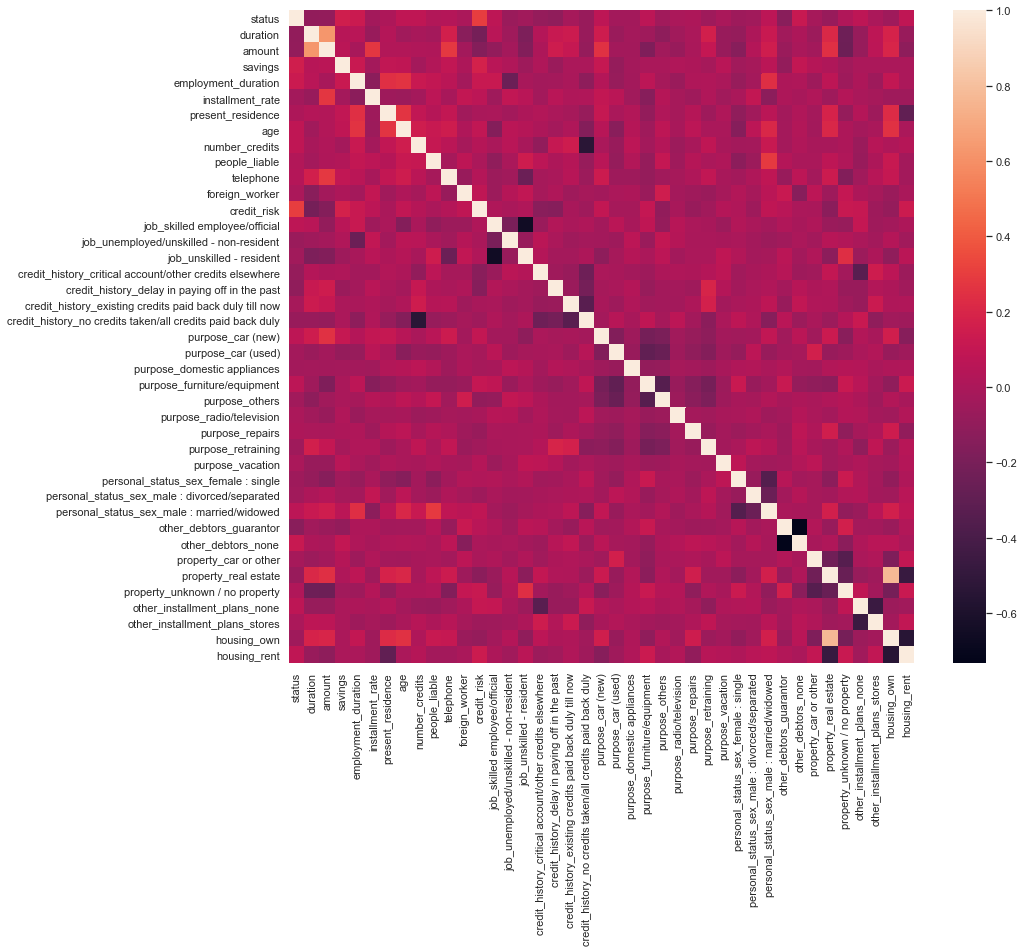

In [48]:
plt.figure(figsize=(14,12))

# Использовалась для поиска зависимостей
sns.heatmap(data.corr())
# data.corr().loc['sq_amount', 'credit_risk']

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data['sq_duration'] = (data['duration'])
data['sq_amount'] = (data['amount'])

In [50]:
# Получается, что зависимость credit_risk от квадрата duration выше, чем от duration,
# что и позволяет нам получить точность выше 0.6

data['sq_duration'] = (data['duration']) ** 2

X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

def predict(Xtest: np.array) -> np.array:
    # Или создать dataframe, равный исходному и дропнуть credit_risk
    df = pd.DataFrame(Xtest, columns=(list(data.columns[:12]) + list(data.columns[13:])))
    d = df['sq_duration'].apply(lambda x: (x < Xtest[:, -2].mean()).astype(int))
    
    return d

In [51]:
accuracy_score(y_test, predict(X_test))

0.644

In [52]:
# Получается, что зависимость credit_risk от 4й степени из amount выше, чем от amount.
# При этом 4я степень даёт бОльшую эффективность.

data['sq_amount'] = (data['amount']) ** 4

X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

def predict(Xtest: np.array) -> np.array:
    df = pd.DataFrame(Xtest, columns=(list(data.columns[:12]) + list(data.columns[13:])))
    d = df['sq_amount'].apply(lambda x: (x < Xtest[:, -1].mean()).astype(int))

    return d

In [53]:
accuracy_score(y_test, predict(X_test))

0.648

In [54]:
# Используем числовые значения (относительно соответствующих средних).
# Результат всё ещё хуже константной модели!!! (0.66)

data['sq_duration'] = (data['duration']) ** 2

X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

data['sq_amount'] = (data['amount']) ** 4

X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)


def predict(Xtest: np.array) -> np.array:
    df = pd.DataFrame(Xtest, columns=(list(data.columns[:12]) + list(data.columns[13:])))
    d1 = df['sq_duration'].apply(lambda x: (x < Xtest[:, -2].mean()).astype(int))
    
    d2 = df['sq_amount'].apply(lambda x: (x < Xtest[:, -1].mean()).astype(int))
    
    return d1 & d2 

In [55]:
accuracy_score(y_test, predict(X_test))

0.64

In [56]:
# Используя status также можно добиться результата > 0.6, так как 
# его можно считать непрерывной величиной(по изначальному смыслу)

X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

def predict(Xtest: np.array) -> np.array:
    df = pd.DataFrame(Xtest, columns=(list(data.columns[:12]) + list(data.columns[13:])))
    d = df['status'].apply(lambda x: 1 if x >= 2 else 0)
    return d

In [57]:
accuracy_score(y_test, predict(X_test))

0.628

In [58]:
# Использование status всё ещё не превосходит константной модели

X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

def predict(Xtest: np.array) -> np.array:
    df = pd.DataFrame(Xtest, columns=(list(data.columns[:12]) + list(data.columns[13:])))
    d = df['employment_duration'].apply(lambda x: 1 if x >= 2 else 0)
    return d

In [59]:
accuracy_score(y_test, predict(X_test))

0.64

> Объединим результаты выше, имитируя веса в реальных моделях.
Для этого проанализируем корреляцию конкретных значений и зададим вес каждого значения в соответствии с его вкладом в `credit_risk`. Каждое из значений признака преобразовывается в приближённый наиболее вероятный результат. (То есть, чтобы `credit_risk` -> 'good', необходимо, чтобы `savings` было выше среднего. **(**Признак количественный -> мы можем его так интерпретировать)**)**

Далее получаем общее суммарное значение, которое оцениваем относительно половины максимально возможного количества баллов.

In [60]:
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

data['sq_amount'] = (data['amount']) ** 4
data['sq_duration'] = (data['duration']) ** 2

weights=dict()
for cat in ['savings', 'status', 'employment_duration', 'foreign_worker', 'sq_duration', 'sq_amount']:
    weights[cat] = data.corr().loc[cat, 'credit_risk']

print(weights)

def predict(Xtest: np.array) -> np.array:
    df = pd.DataFrame(Xtest, columns=(list(data.columns[:12]) + list(data.columns[13:])))
    d1 = df['savings'].apply(lambda x: 3 if x >= 2 else 0)
    d2 = df['status'].apply(lambda x: 4 if x >= 2 else 0)
    d3 = df['employment_duration'].apply(lambda x: 2 if x >= 2 else 0)
    d4 = df['foreign_worker'].apply(lambda x: 1 if x == 0 else 0)
    d5 = df['sq_duration'].apply(lambda x: (x < Xtest[:, -2].mean()).astype(int)*2)
    d6 = df['sq_amount'].apply(lambda x: (x < Xtest[:, -1].mean()).astype(int)*1.5)
    res = d1 + d2 + d3 + d4 + d5 + d6
    res = pd.DataFrame(res, columns=['result'])
    res['result'] = res['result'].apply(lambda x: 1 if x >= 6.4 else 0)
    return res

{'savings': 0.17894273593792143, 'status': 0.30240600233725745, 'employment_duration': 0.11600203637423227, 'foreign_worker': 0.08207949878149648, 'sq_duration': -0.20099604430942555, 'sq_amount': -0.14747727519955686}


In [61]:
accuracy_score(y_test, predict(X_test))

0.732

In [62]:
value_counts = np.unique(y_test, return_counts=True)
print("Наибольшая возможная accuracy при const-модели:\n", value_counts[1][1] / (value_counts[1][0] + value_counts[1][1]))

Наибольшая возможная accuracy при const-модели:
 0.66
